## Numerov Method (Implicit)
The implementation, although successful, is an implicit one (contains t_n+1 on both sides of the = sign)

However, this has been customised slightly to function for the following type of problems (Demonstrated below as well).
1. y" = g(t) y(t) - General Numerov 
2. y" = g(t) - Gravity problem for example.

### EXPLICIT NUMEROV, in propagator form, is implemented down below, but it works only for the 1st type.

In [51]:
import numpy as np
from matplotlib import pyplot as plt

def numerov_general(func, y0, v0, h, t):
    """
    General Numerov method implementation for solving second-order ODEs of the form:
        y''(t) = f(t, y) = g(t) y(t)
    
    Parameters:
    - func: The function f(t, y), which represents the second derivative y''(t).
    - y0: Initial condition y(t0) (position).
    - v0: Initial velocity y'(t0).
    - h: Step size for the numerical method.
    - t: Array of time grid points.

    Returns:
    - y: Array of dependent variable values computed using the Numerov method.
    """
    y = np.zeros_like(t)
    y[0] = y0  # Initial condition for position
    y[1] = y0 + v0 * h + 0.5 * func(t[0], y0) * h**2  # Initial second step using Taylor expansion

    for n in range(1, len(t) - 1):
        # Evaluate the function at required points
        f_t_n_minus_1 = func(t[n - 1], y[n - 1])
        f_t_n = func(t[n], y[n])
        f_t_n_plus_1 = func(t[n + 1], y[n])  # Use current y[n] as an approximation

        # Numerov update
        y[n + 1] = (
            2 * y[n] - y[n - 1] + h**2 / 12 * (f_t_n_plus_1 + 10 * f_t_n + f_t_n_minus_1)
        )

    return y

# This implementation can now handle any function of the form f(t, y). Let me know if you'd like me to test it on other examples.


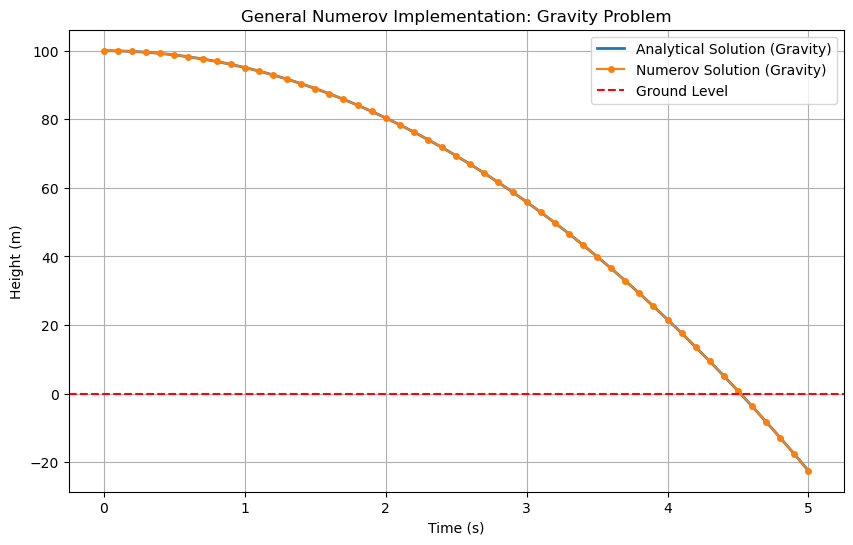

In [52]:
# Example: Gravity problem (no explicit y-dependence)
def gravity_func_general(t, y):
    return -9.8  # Constant acceleration

# Parameters
t_start, t_end = 0, 5  # Time range in seconds
h = 0.1  # Time step
t = np.arange(t_start, t_end + h, h)  # Time array
y0 = 100  # Initial height (m)
v0 = 0  # Initial velocity (m/s)

# Solve using the general Numerov method
y_numerov_gravity = numerov_general(gravity_func_general, y0, v0, h, t)

# Analytical solution for comparison
y_analytical_gravity = y0 + v0 * t + 0.5 * gravity_func_general(0, 0) * t**2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_gravity, label="Analytical Solution (Gravity)", linewidth=2)
plt.plot(t, y_numerov_gravity, 'o-', label="Numerov Solution (Gravity)", linewidth=1.5, markersize=4)
plt.axhline(0, color='r', linestyle='--', label="Ground Level")
plt.title("General Numerov Implementation: Gravity Problem")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid()
plt.show()

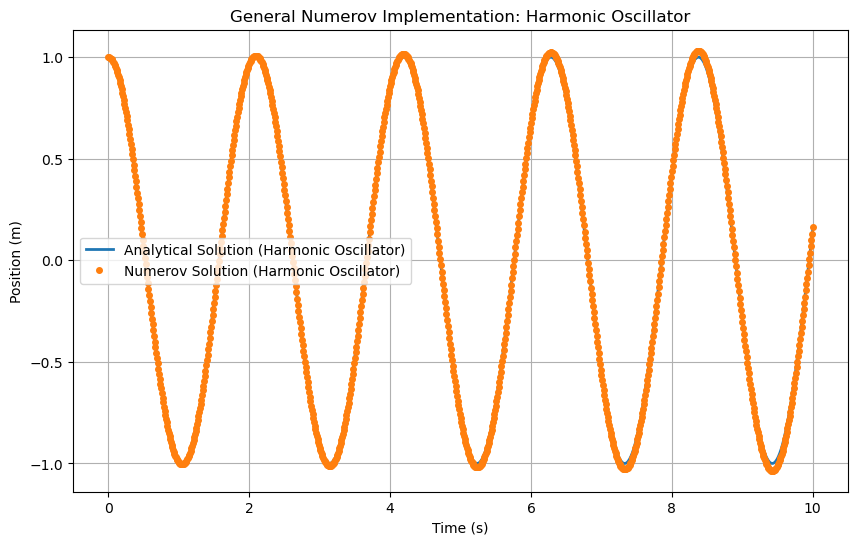

In [53]:
# Harmonic oscillator function for general Numerov
def harmonic_oscillator_func_general(t, y):
    omega = 3  # Angular frequency (rad/s)
    return -omega**2 * y  # y'' = -ω^2 * y

# Parameters for the harmonic oscillator problem
y0 = 1  # Initial position (amplitude)
v0 = 0  # Initial velocity
h = 0.01  # Smaller step size for better accuracy
t_start, t_end = 0, 10  # Time range in seconds
t = np.arange(t_start, t_end + h, h)  # Time array

# Solve the harmonic oscillator using the general Numerov method
y_numerov_harmonic = numerov_general(harmonic_oscillator_func_general, y0, v0, h, t)

# Analytical solution for comparison
omega = 3
y_analytical_harmonic = y0 * np.cos(omega * t)  # Analytical solution for simple harmonic motion

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_harmonic, label="Analytical Solution (Harmonic Oscillator)", linewidth=2)
plt.plot(t, y_numerov_harmonic, 'o', label="Numerov Solution (Harmonic Oscillator)", linewidth=1.5, markersize=4)
plt.title("General Numerov Implementation: Harmonic Oscillator")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.show()



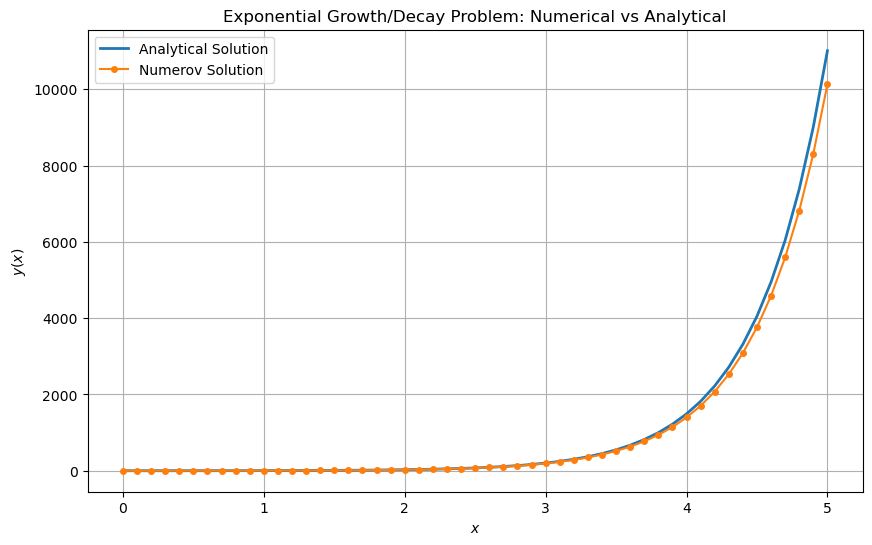

In [54]:
# Exponential growth/decay function for Numerov
def exponential_growth_decay_func(t, y):
    k = 2  # Positive constant k
    return k**2 * y  # y'' = k^2 * y

# Parameters
x_start, x_end = 0, 5  # Range for x
h = 0.1  # Step size
x = np.arange(x_start, x_end + h, h)  # x grid
y0 = 1  # Initial condition y(0)
v0 = 0  # Initial velocity dy/dx(0)

# Solve using the general Numerov method
y_numerov_exp = numerov_general(exponential_growth_decay_func, y0, v0, h, x)

# Analytical solution for comparison
k = 2
y_analytical_exp = np.cosh(k * x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_analytical_exp, label="Analytical Solution", linewidth=2)
plt.plot(x, y_numerov_exp, 'o-', label="Numerov Solution", linewidth=1.5, markersize=4)
plt.title("Exponential Growth/Decay Problem: Numerical vs Analytical")
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.legend()
plt.grid()
plt.show()


## EXPLICIT Numerov

The above implicit method has been fashioned into the explicit PROPAGTOR form, such that the implementation is steamlined.

- This, however, does not work for the gravity type problems.
- We want to solve the SCHRODINGER EQUATION, for which this format will work just fine, and so we will not refine it anymore.
- tested with exponential rise and decay problems, as well as oscillatory ones.


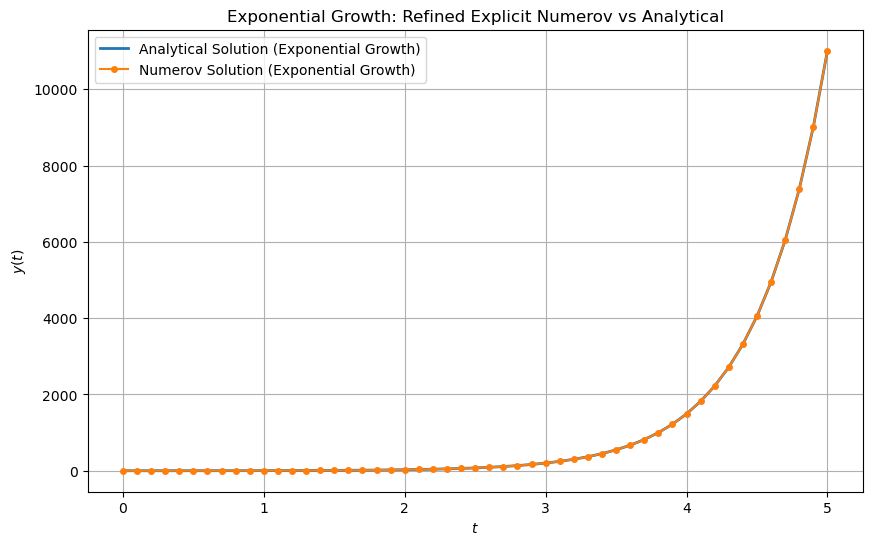

In [ ]:
# Re-implement the refined explicit Numerov propagator
def numerov_explicit(func, y0, v0, h, t):
    """
    Refined explicit Numerov propagator for solving y''(t) = g(t)y(t).
    
    Parameters:
    - func: The function g(t), such that y''(t) = g(t)y(t).
    - y0: Initial condition y(t0).
    - v0: Initial velocity y'(t0).
    - h: Step size for the numerical method.
    - t: Array of time points.
    
    Returns:
    - y: Array of dependent variable values computed using the explicit Numerov method.
    """
    y = np.zeros_like(t)
    y[0] = y0
    y[1] = y0 + v0 * h + 0.5 * func(t[0]) * y0 * h**2  # Compute second step using Taylor expansion

    for n in range(1, len(t) - 1):
        # Compute coefficients a, b, c
        g_n = func(t[n])
        g_n_minus_1 = func(t[n - 1])
        g_n_plus_1 = func(t[n + 1])

        a = 2 + (5 / 6) * g_n * h**2
        b = 1 - (1 / 12) * g_n_minus_1 * h**2
        c = 1 - (1 / 12) * g_n_plus_1 * h**2

        # Update y[n+1] explicitly
        y[n + 1] = (a * y[n] - b * y[n - 1]) / c

    return y


# Example: Exponential growth (y'' = k^2 y)
def exponential_growth_g(t):
    k = 2  # Growth rate constant
    return k**2  # g(t) = k^2

# Parameters
y0_exponential = 1  # Initial condition y(0)
v0_exponential = 0  # Initial velocity dy/dx(0)
h = 0.1  # Step size
t = np.arange(0, 5 + h, h)  # Time grid

# Solve using the refined explicit Numerov method
y_exponential = numerov_explicit(exponential_growth_g, y0_exponential, v0_exponential, h, t)

# Analytical solution for comparison
k = 2
y_analytical_exponential = np.cosh(k * t)  # Analytical solution: y(t) = cosh(k * t)

# Plot results for the exponential growth problem
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_exponential, label="Analytical Solution (Exponential Growth)", linewidth=2)
plt.plot(t, y_exponential, 'o-', label="Numerov Solution (Exponential Growth)", linewidth=1.5, markersize=4)
plt.title("Exponential Growth: Refined Explicit Numerov vs Analytical")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.grid()
plt.show()



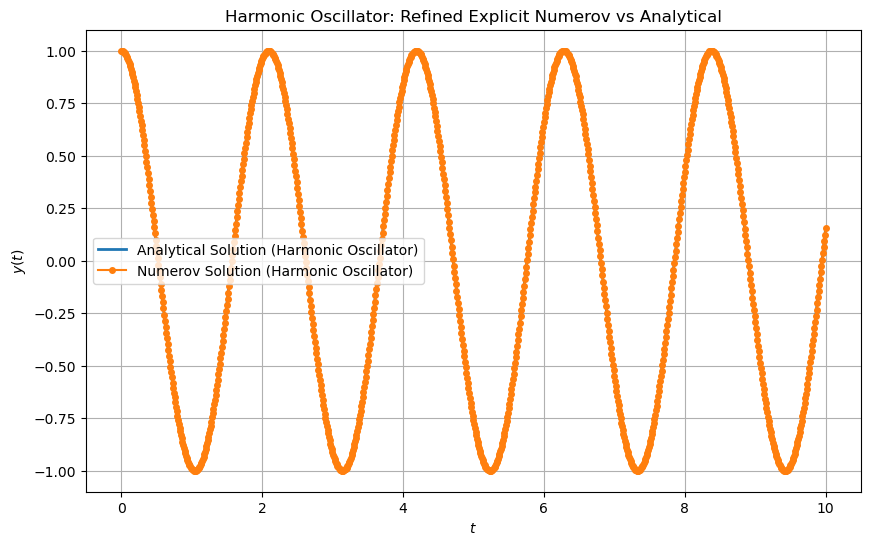

In [56]:
def harmonic_oscillator_g(t):
    omega = 3  # Angular frequency
    return -omega**2  # g(t) = -ω^2

# Solve the harmonic oscillator problem
y0_harmonic = 1  # Initial position
v0_harmonic = 0  # Initial velocity
h = 0.01  # Step size
t = np.arange(0, 10 + h, h)  # Time grid

y_harmonic = numerov_explicit(harmonic_oscillator_g, y0_harmonic, v0_harmonic, h, t)

# Analytical solution for comparison
omega = 3
y_analytical_harmonic = y0_harmonic * np.cos(omega * t)

# Plot results for the harmonic oscillator
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_harmonic, label="Analytical Solution (Harmonic Oscillator)", linewidth=2)
plt.plot(t, y_harmonic, 'o-', label="Numerov Solution (Harmonic Oscillator)", linewidth=1.5, markersize=4)
plt.title("Harmonic Oscillator: Refined Explicit Numerov vs Analytical")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend()
plt.grid()
plt.show()